In [17]:
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
class Graph:
    def __init__(self, graph_id):
        self.graph_id = graph_id
        self.edges = []
        self.nodes = set()

    def add_edge(self, u, v, label_u, label_v, edge_label):
        self.edges.append((u, v, label_u, label_v, edge_label))
        self.nodes.add(u)
        self.nodes.add(v)

In [19]:
class DFSCode:
    def __init__(self):
        self.dfs_code = []

    def append(self, u, v, edge_label):
        self.dfs_code.append((u, v, edge_label))

In [23]:
class gSpan:
    def __init__(self, min_support):
        self.min_support = min_support
        self.graphs = []
        self.frequent_subgraphs = []

    def load_graphs(self, graph_database):
        self.graphs = graph_database

    def find_frequent_subgraphs(self):
        for graph in self.graphs:
            self.dfs(graph, DFSCode(), 0)
        return self.frequent_subgraphs

    def dfs(self, graph, dfs_code, depth):
        if self.is_frequent(dfs_code):
            self.frequent_subgraphs.append(dfs_code.dfs_code)
            candidates = self.generate_candidates(dfs_code, graph)
            for candidate in candidates:
                self.dfs(graph, candidate, depth + 1)

    def is_frequent(self, dfs_code):
        support_count = 0
        for graph in self.graphs:
            if self.contains_subgraph(graph, dfs_code):
                support_count += 1
        return support_count >= self.min_support

    def generate_candidates(self, dfs_code, graph):
        candidates = []
        # Extend the current DFS code and create new candidates (simplified for now)
        return candidates

    def contains_subgraph(self, graph, dfs_code):
        # Simplified for demonstration purposes
        return True

    def visualize_graph(self, graph):
        G = nx.Graph()
        for edge in graph.edges:
            u, v, label_u, label_v, edge_label = edge
            G.add_node(u, label=label_u)
            G.add_node(v, label=label_v)
            G.add_edge(u, v, label=edge_label)

        pos = nx.spring_layout(G)
        labels = nx.get_edge_attributes(G, 'label')
        node_labels = nx.get_node_attributes(G, 'label')

        nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='lightblue', font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.show()

In [21]:
def create_sample_graphs():
    # Graph 1
    graph1 = Graph(graph_id=1)
    graph1.add_edge(1, 2, 'A', 'B', 'x')
    graph1.add_edge(2, 3, 'B', 'C', 'y')

    # Graph 2
    graph2 = Graph(graph_id=2)
    graph2.add_edge(1, 2, 'A', 'B', 'x')
    graph2.add_edge(2, 4, 'B', 'D', 'z')

    return [graph1, graph2]

Visualizing Graph 1


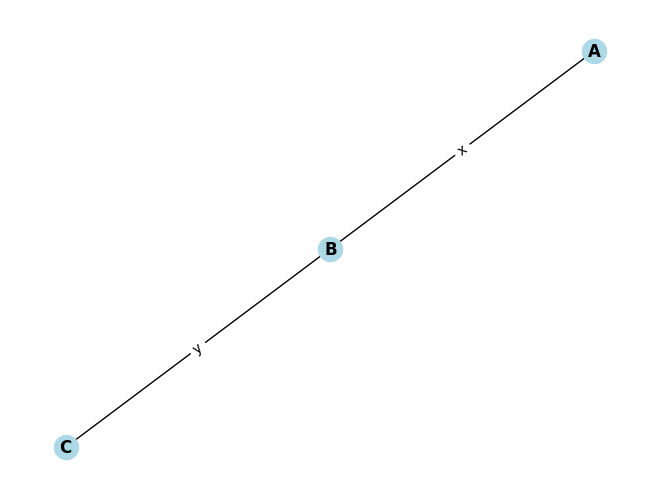

Visualizing Graph 2


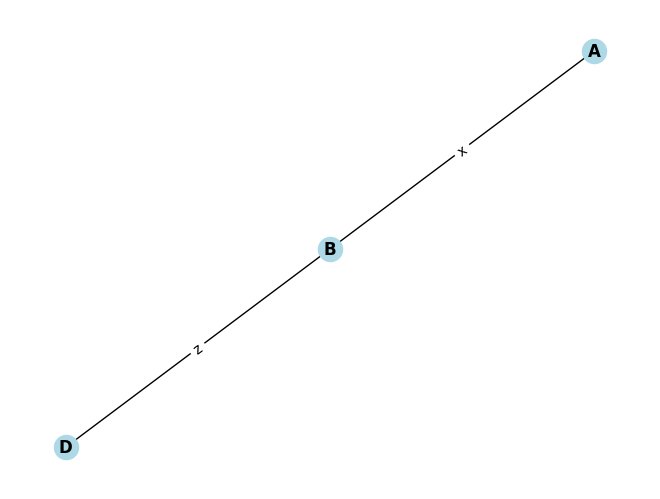

In [22]:
# Main execution
gspan = gSpan(min_support=1)
graph_database = create_sample_graphs()
gspan.load_graphs(graph_database)

# Find frequent subgraphs (simplified)
frequent_subgraphs = gspan.find_frequent_subgraphs()

# Visualize the sample graphs
for graph in graph_database:
    print(f"Visualizing Graph {graph.graph_id}")
    gspan.visualize_graph(graph)
